In [1]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

import seaborn as sns
sns.set(style='dark', font_scale=1.7)

import warnings
warnings.filterwarnings('ignore')

### Генерация данных

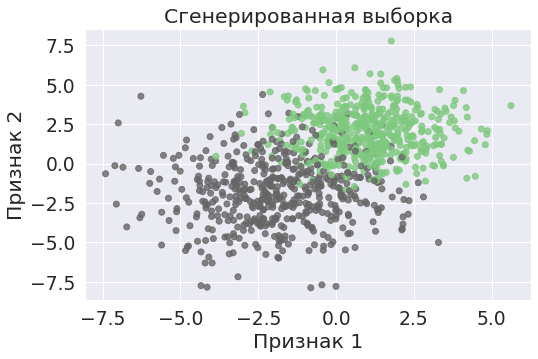

In [2]:
X, y = make_blobs(n_samples=(500, 500), centers=[[1, 2], [-2, -2]], 
                  cluster_std=[1.5, 2], random_state=42)

plt.figure(figsize=(8, 5))
plt.title('Сгенерированная выборка')
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, cmap='Accent')
plt.grid()
plt.xlabel('Признак 1'), plt.ylabel('Признак 2')
plt.show()

Разделим на обучающую и тестовую выборки

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((850, 2), (150, 2), (850,), (150,))

Обучим метод трех ближайших соседей

In [4]:
model = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

Качество на тесте

In [5]:
accuracy_score(y_test, model.predict(X_test)), \
f1_score(y_test, model.predict(X_test))

(0.9466666666666667, 0.9444444444444444)

### Визуализация

In [10]:
def generate_grid(train_sample, border=1, step=0.05):
    return np.meshgrid(
        np.arange(min(train_sample[:, 0]) - border, 
                  max(train_sample[:, 0]) + border, 
                  step),
        np.arange(min(train_sample[:, 1]) - border, 
                  max(train_sample[:, 1]) + border, 
                  step)
    )

In [7]:
def create_picture(X_train, y_train, model, border=1, 
                   step=0.05, figsize=(18, 5), 
                   cmap='winter', alpha=1):
    
    # == Создание сетки ==
    grid = generate_grid(X_train, border, step)
    # Выворачивание сетки
    grid_ravel = np.c_[grid[0].ravel(), grid[1].ravel(0)]
    
    # == Предсказание значений для сетки == 
    # Берем вероятности для первого класса
    grid_predicted_ravel = model.predict_proba(grid_ravel)[:, 1]
    # Подгоняем размер
    grid_predicted = grid_predicted_ravel.reshape(grid[0].shape)
    
    
    # == Построение фигуры ==
    plt.figure(figsize=figsize)
    
    plt.subplot(1, 2, 1)
    plt.pcolormesh(grid[0], grid[1], grid_predicted > 0.5, cmap=cmap)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
                alpha=alpha, cmap=cmap, edgecolor='black')
    plt.xlim((min(grid_ravel[:, 0]), max(grid_ravel[:, 0])))
    plt.ylim((min(grid_ravel[:, 1]), max(grid_ravel[:, 1])))
    plt.title(u'Классификация {}-NN'.format(model.get_params()['n_neighbors']))
    
    plt.subplot(1, 2, 2)
    plt.pcolormesh(grid[0], grid[1], grid_predicted, cmap=cmap)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, 
                alpha=alpha, cmap=cmap, edgecolor='black')
    plt.xlim((min(grid_ravel[:, 0]), max(grid_ravel[:, 0])))
    plt.ylim((min(grid_ravel[:, 1]), max(grid_ravel[:, 1])))
    plt.title(u'Вероятности {}-NN'.format(model.get_params()['n_neighbors']))
    
    plt.show()

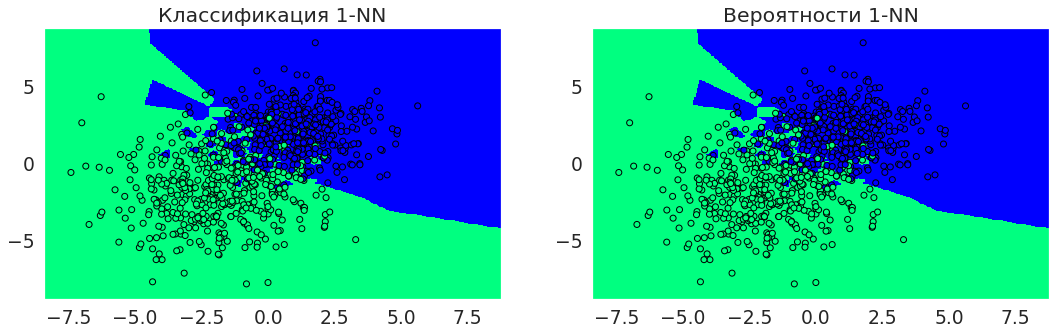

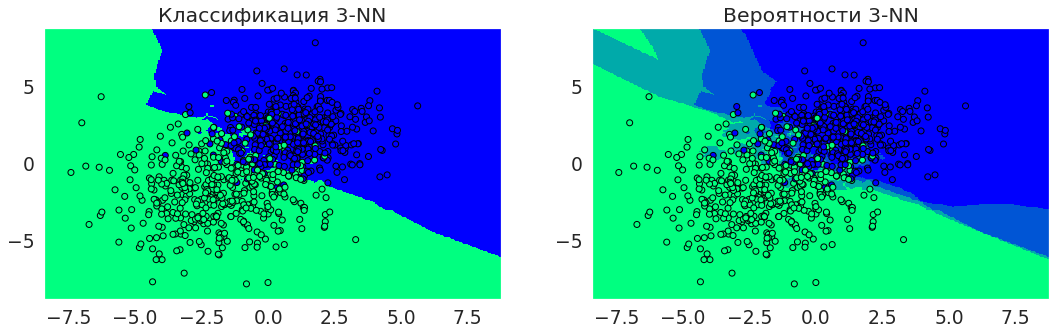

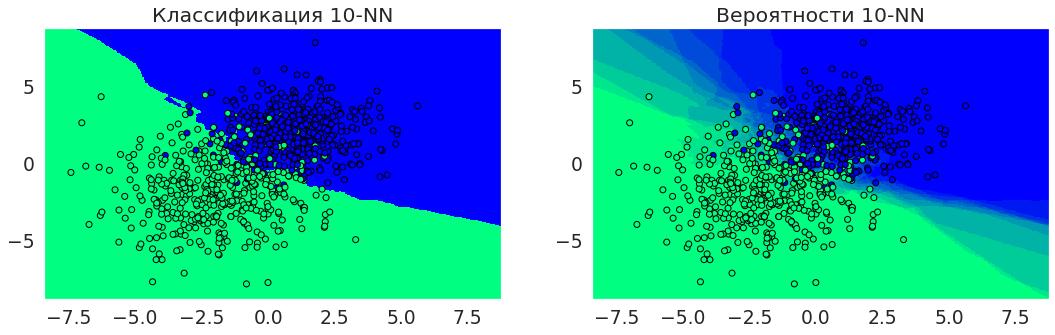

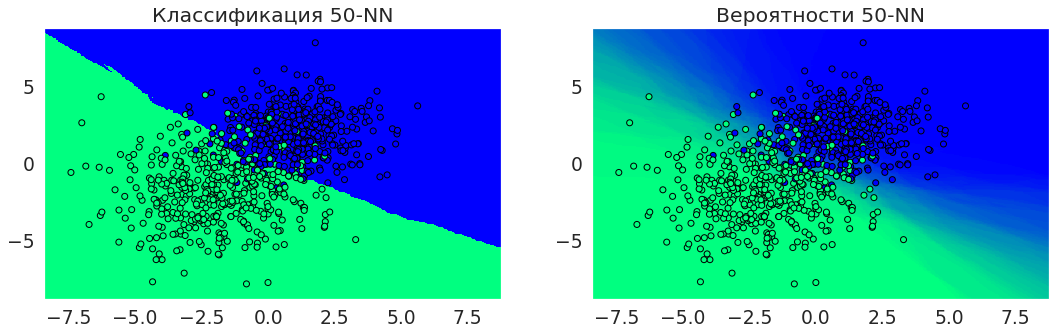

In [8]:
for n_neighbors in [1, 3, 10, 50]:
    create_picture(
        X_train, 
        y_train, 
        KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    )

### Метрика $L_1$

Расстояние до соседей будем считать по $L_1$ метрике

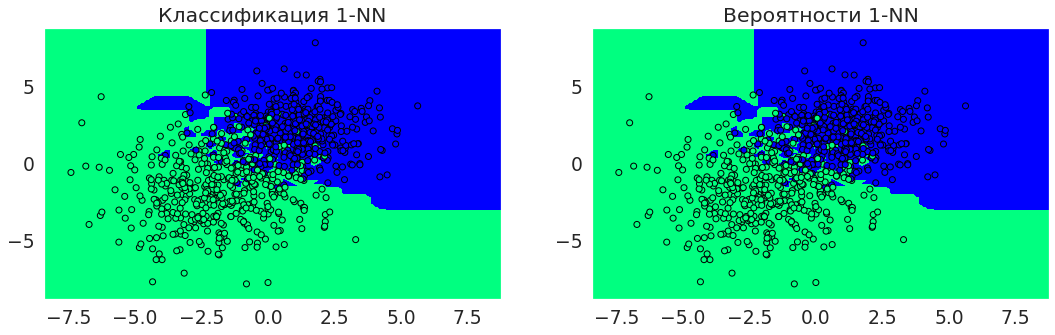

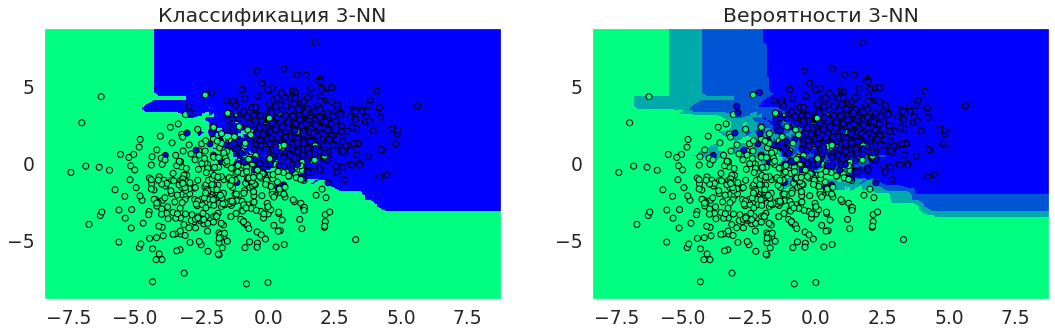

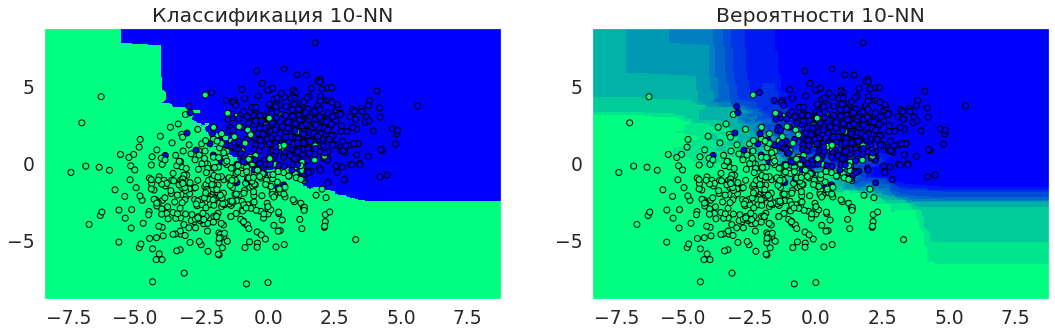

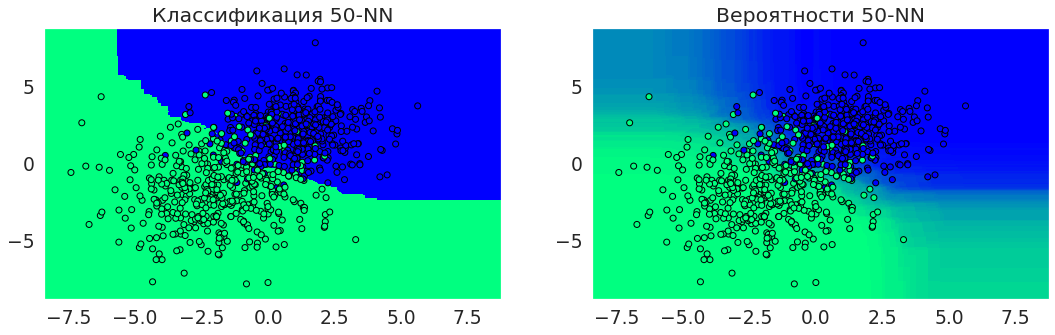

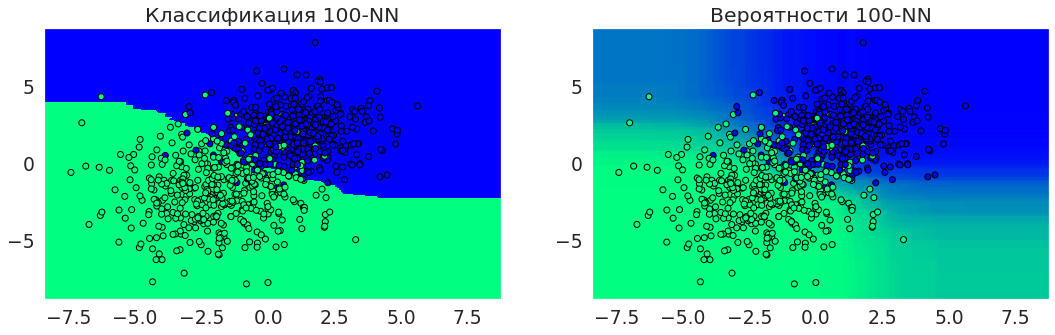

In [9]:
for n_neighbors in [1, 3, 10, 50, 100]:
    create_picture(
        X_train, 
        y_train, 
        KNeighborsClassifier(n_neighbors=n_neighbors, p=1).fit(X_train, y_train)
    )